In [106]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import torch
import os
from numba import cuda 
plt.style.use("science.mplstyle")


from helpers.composite_helpers import *

In [107]:
curtains_dir = "/global/home/users/rrmastandrea/CURTAINS_SALAD/LHCO_0sig/"



paths_dict = {"double_base":0,
              "base_to_data": ["saved_models_baseline_SIM2DAT_","seed"],
              "II": ["saved_models_II_SIM2DAT_","seed"],
              "L2": ["saved_models_L2_SIM2DAT_", "seed_0.01alpha"],
             }


bands = ["sb1", "sr", "sb2"]


In [117]:
distances_dicts = {k:{band:[] for band in bands} for k in paths_dict.keys()}
distances_dicts_single = {k:{band:{i:[] for i in range(5)} for band in bands} for k in paths_dict.keys()}

for band in bands:

    for k in paths_dict.keys():

        # load in the data

        for seed in range(1, 2):

            if k == "double_base":
                loc_path = f"{curtains_dir}/s2d_direct_transfer_{seed}seed/npy_samples"

            else:

                p1, p2 = paths_dict[k]
                loc_path = f"{curtains_dir}/saved_models_baseline_BDSIM_{seed}seed/{p1}{seed}{p2}/npy_samples"

            # load in the untransformed samples
            loc_untrans = np.load(f"{loc_path}/{band}_SIM.npy")[:, :5]

            # load in the transformed samples
            loc_trans = np.load(f"{loc_path}/{band}_transSIM.npy")[:, :5]
                        
            # calculate the distance traveled between the samples in total
            loc_dist = np.linalg.norm((loc_untrans - loc_trans), axis = 1)
            distances_dicts[k][band] += list(loc_dist)
            
            # calculate the distance traveled between the samples for each feature
            for i in range(5):
                loc_untrans_features = loc_untrans[:,i]
                loc_trans_features = loc_trans[:,i]
                loc_dist_features = np.abs(loc_untrans_features - loc_trans_features)
                distances_dicts_single[k][band][i] += list(loc_dist_features)



{'double_base': {'sb1': {0: [], 1: [], 2: [], 3: [], 4: []}, 'sr': {0: [], 1: [], 2: [], 3: [], 4: []}, 'sb2': {0: [], 1: [], 2: [], 3: [], 4: []}}, 'base_to_data': {'sb1': {0: [], 1: [], 2: [], 3: [], 4: []}, 'sr': {0: [], 1: [], 2: [], 3: [], 4: []}, 'sb2': {0: [], 1: [], 2: [], 3: [], 4: []}}, 'II': {'sb1': {0: [], 1: [], 2: [], 3: [], 4: []}, 'sr': {0: [], 1: [], 2: [], 3: [], 4: []}, 'sb2': {0: [], 1: [], 2: [], 3: [], 4: []}}, 'L2': {'sb1': {0: [], 1: [], 2: [], 3: [], 4: []}, 'sr': {0: [], 1: [], 2: [], 3: [], 4: []}, 'sb2': {0: [], 1: [], 2: [], 3: [], 4: []}}}


## Poster plots

/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:54: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


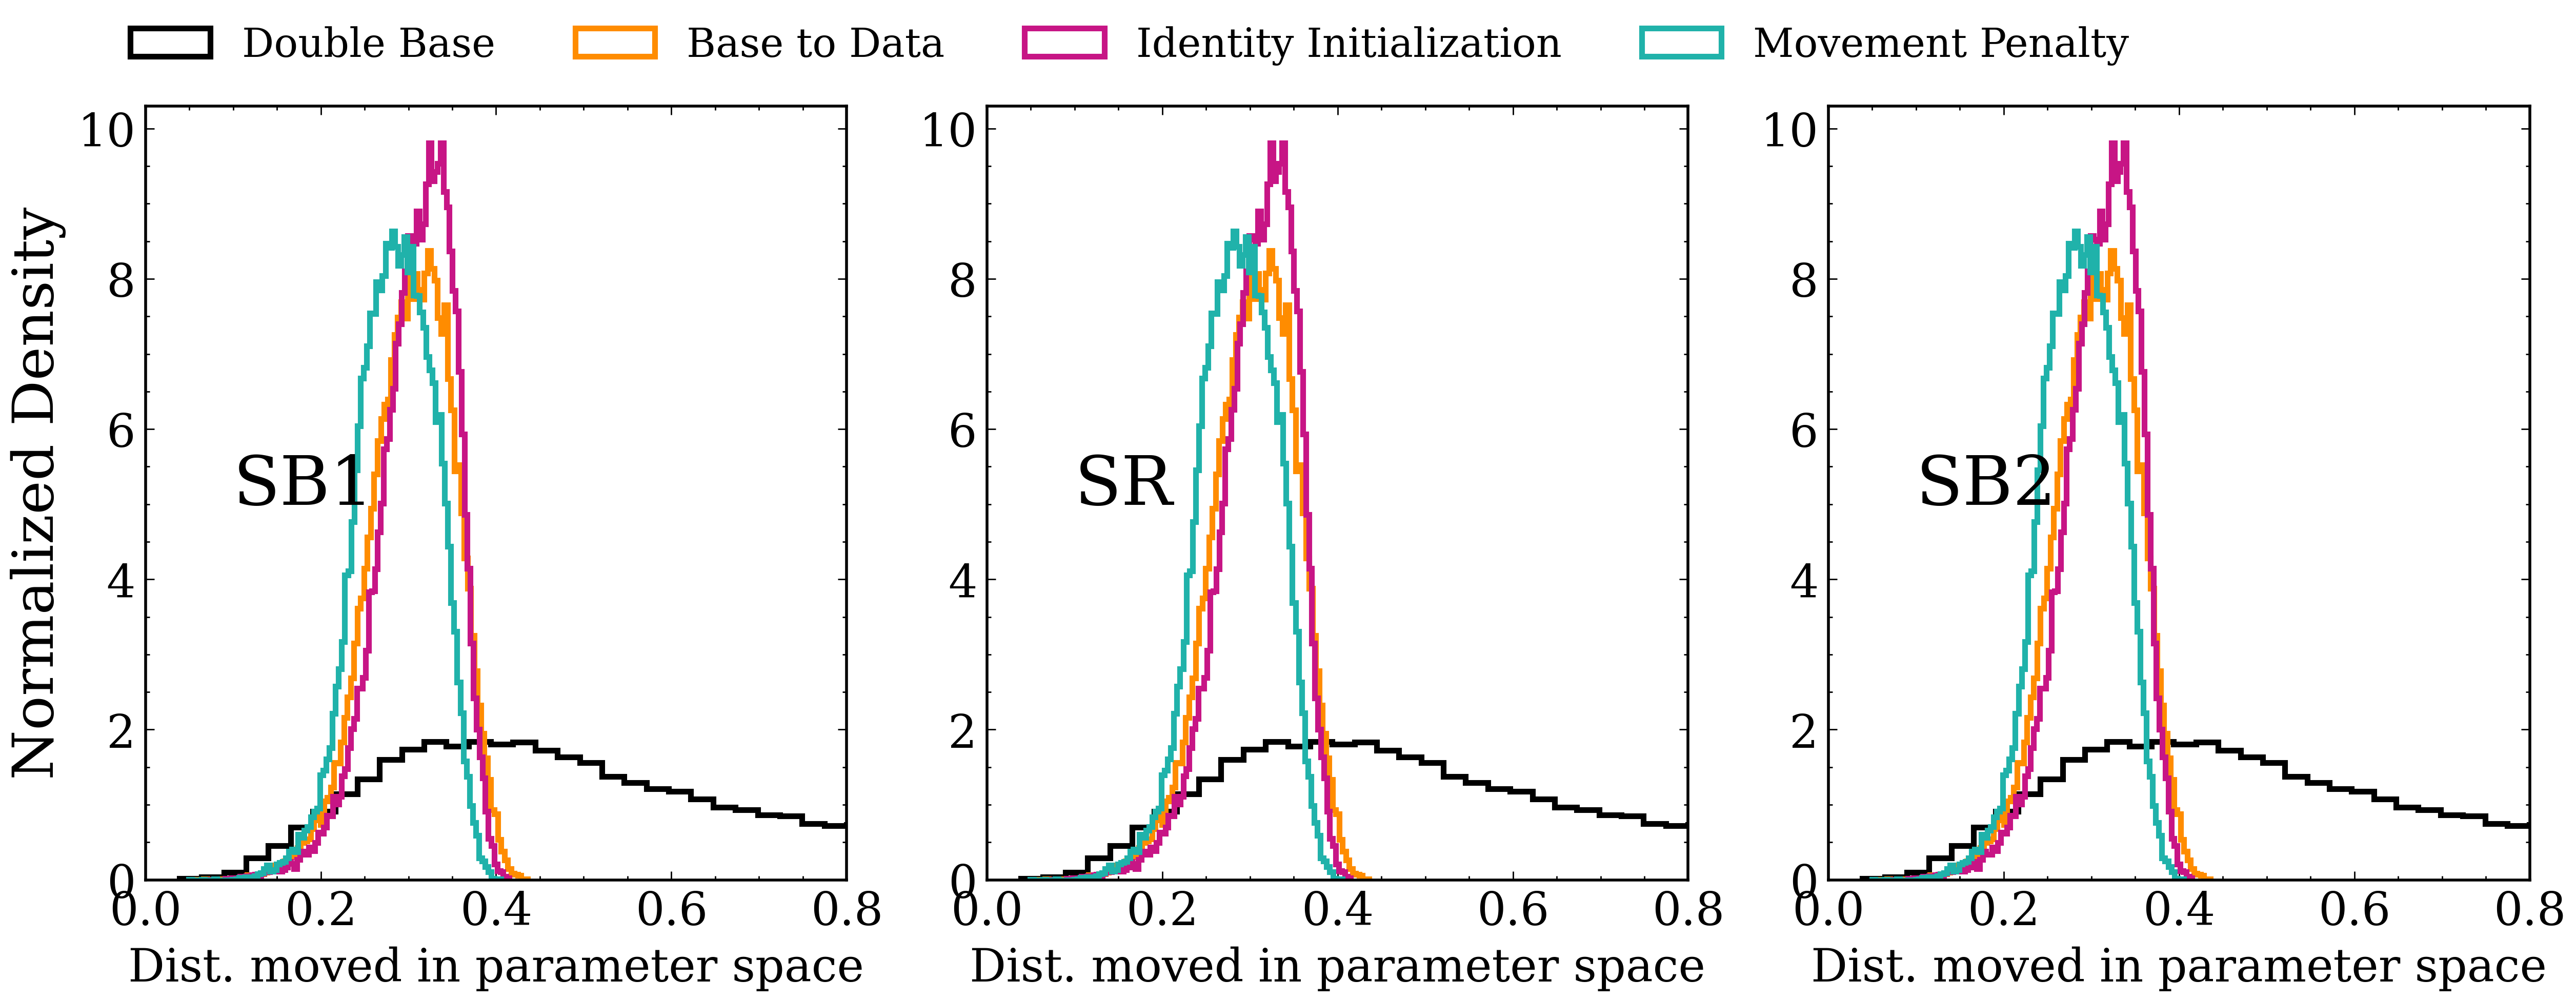

In [124]:
# features plots

alpha = 0.5
w = 2.
dpi = 800



colors_dict = {"double_base":"black",
              "base_to_data":"darkorange",
              "II": "mediumvioletred",
              "L2":"lightseagreen",
             }




labels_dict = {"double_base":"Double Base",
              "base_to_data": "Base to Data",
              "II": "Identity Initialization",
              "L2": "Movement Penalty",
             }



import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 1 #set the value globally


fig, ax = plt.subplots(1, 3, figsize = (15, 5))

for k in paths_dict.keys():
    
    for i in range(3):
        
        ax[i].hist(distances_dicts[k][band], bins = 100, density = True, histtype = "step",
                   label = labels_dict[k], color = colors_dict[k], linewidth = w)
        
        
        
        ax[i].set_xlim(0, .8)
        ax[i].set_xlabel("Dist. moved in parameter space", fontsize = f - 8)
        
f = 24

ax[0].text(0.1, 5,"SB1", fontsize = f)
ax[1].text(0.1, 5, "SR", fontsize = f)
ax[2].text(0.1, 5, "SB2", fontsize = f)
    
    
ax[0].set_ylabel("Normalized Density")  
plt.legend(fontsize = f - 10, loc='best', bbox_to_anchor=(.45, 1.15), ncol = 4)  

plt.tight_layout()
fig.savefig("paper_plots/dist_moved.png", dpi = dpi)


fig.show()
   

## Paper plots

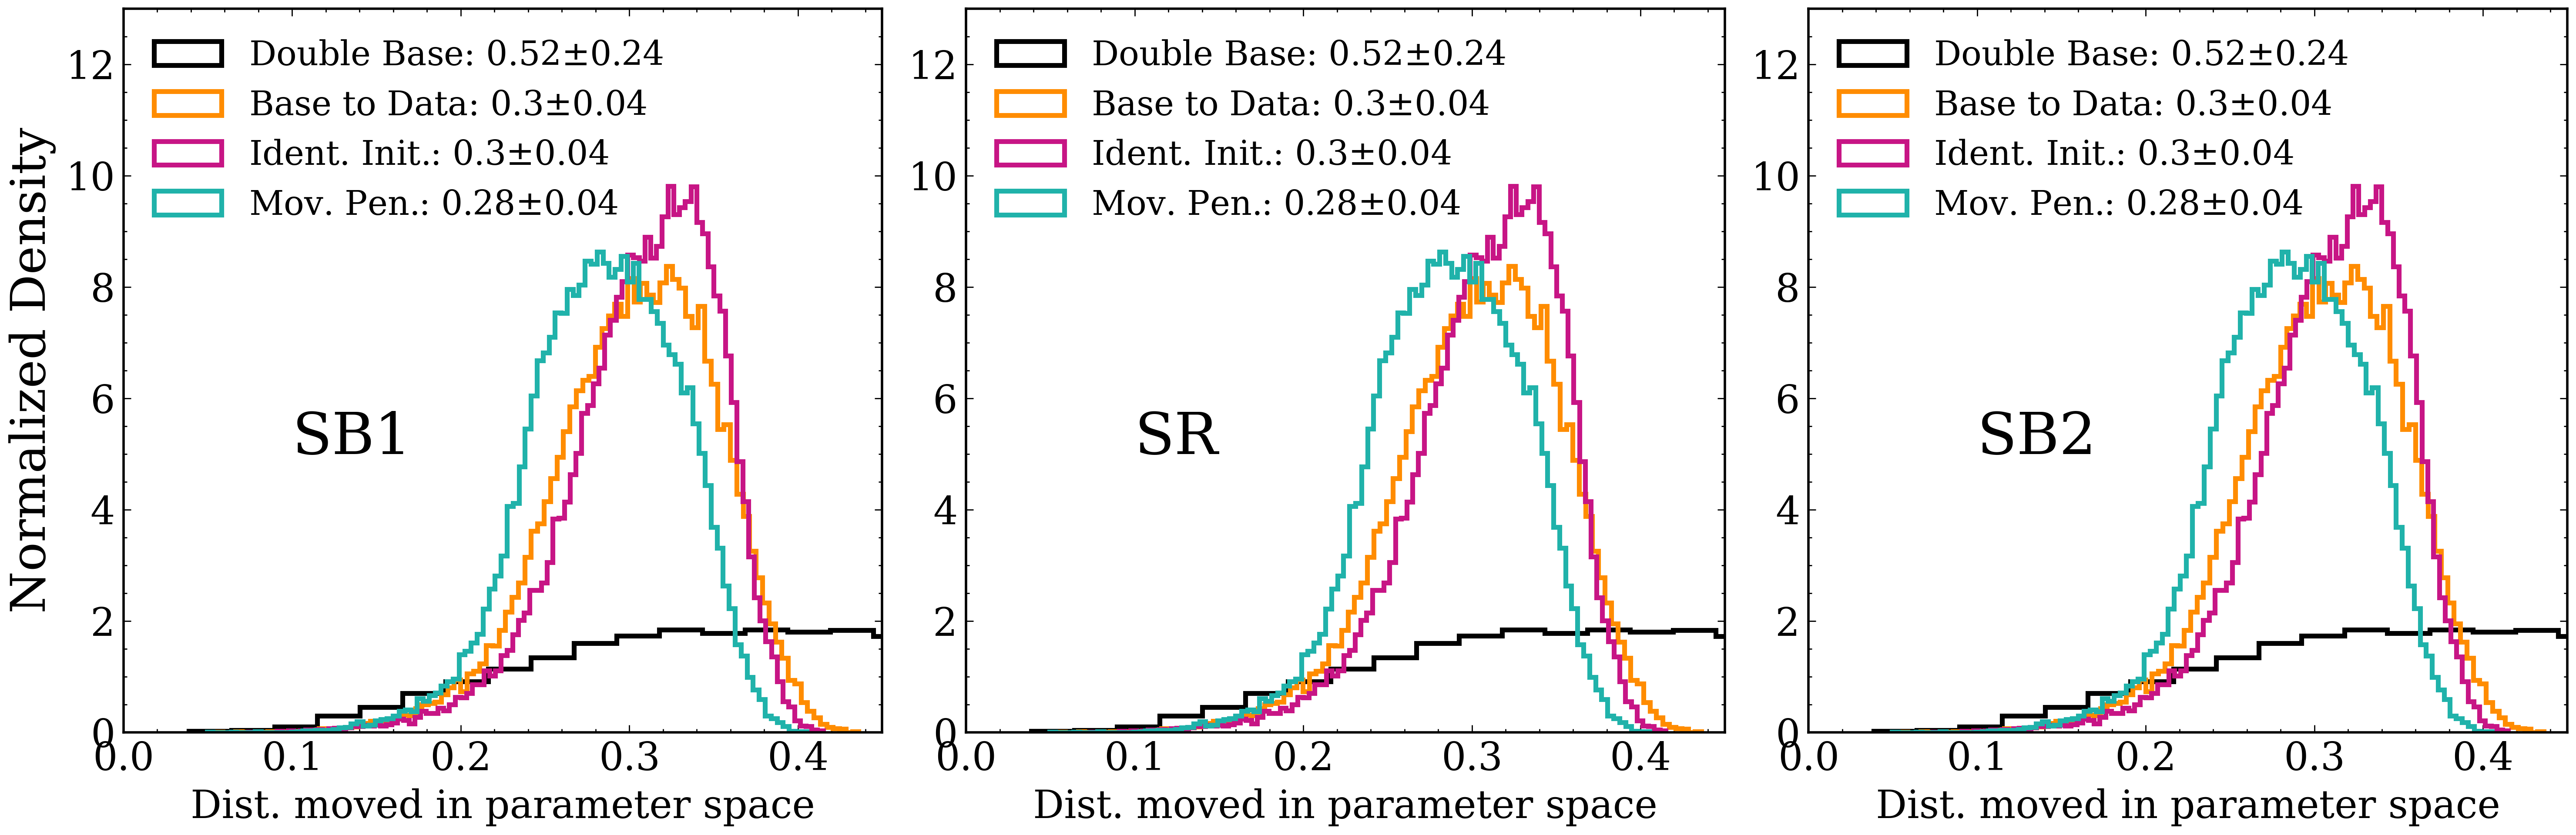

In [139]:
# features plots

alpha = 0.5
w = 2.
dpi = 800



colors_dict = {"double_base":"black",
              "base_to_data":"darkorange",
              "II": "mediumvioletred",
              "L2":"lightseagreen",
             }




labels_dict = {"double_base":"Double Base",
              "base_to_data": "Base to Data",
              "II": "Ident. Init.",
              "L2": "Mov. Pen.",
             }



import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 1 #set the value globally

def trunc(values, decs=0):
    return np.trunc(values*10**decs)/(10**decs)


fig, ax = plt.subplots(1, 3, figsize = (15, 5))

for k in paths_dict.keys():
    
    for i in range(3):
        
        mean_dist = trunc(np.mean(distances_dicts[k][band]), 2)
        var_dist = trunc(np.std(distances_dicts[k][band]), 2)
        
        label_addition = f": {mean_dist}$\pm${var_dist}"
        
        ax[i].hist(distances_dicts[k][band], bins = 100, density = True, histtype = "step",
                   label = labels_dict[k]+label_addition, color = colors_dict[k], linewidth = w)
        
        
        
        ax[i].set_xlim(0, .45)
        ax[i].set_ylim(0, 13)
        ax[i].set_xlabel("Dist. moved in parameter space", fontsize = f - 8)
        ax[i].legend(fontsize = f - 10, loc = "upper left")  
        
f = 24

ax[0].text(0.1, 5,"SB1", fontsize = f)
ax[1].text(0.1, 5, "SR", fontsize = f)
ax[2].text(0.1, 5, "SB2", fontsize = f)
    
    
ax[0].set_ylabel("Normalized Density")  


plt.tight_layout()
fig.savefig("paper_plots/distances.pdf", dpi = dpi)


fig.show()
   

### Single feature

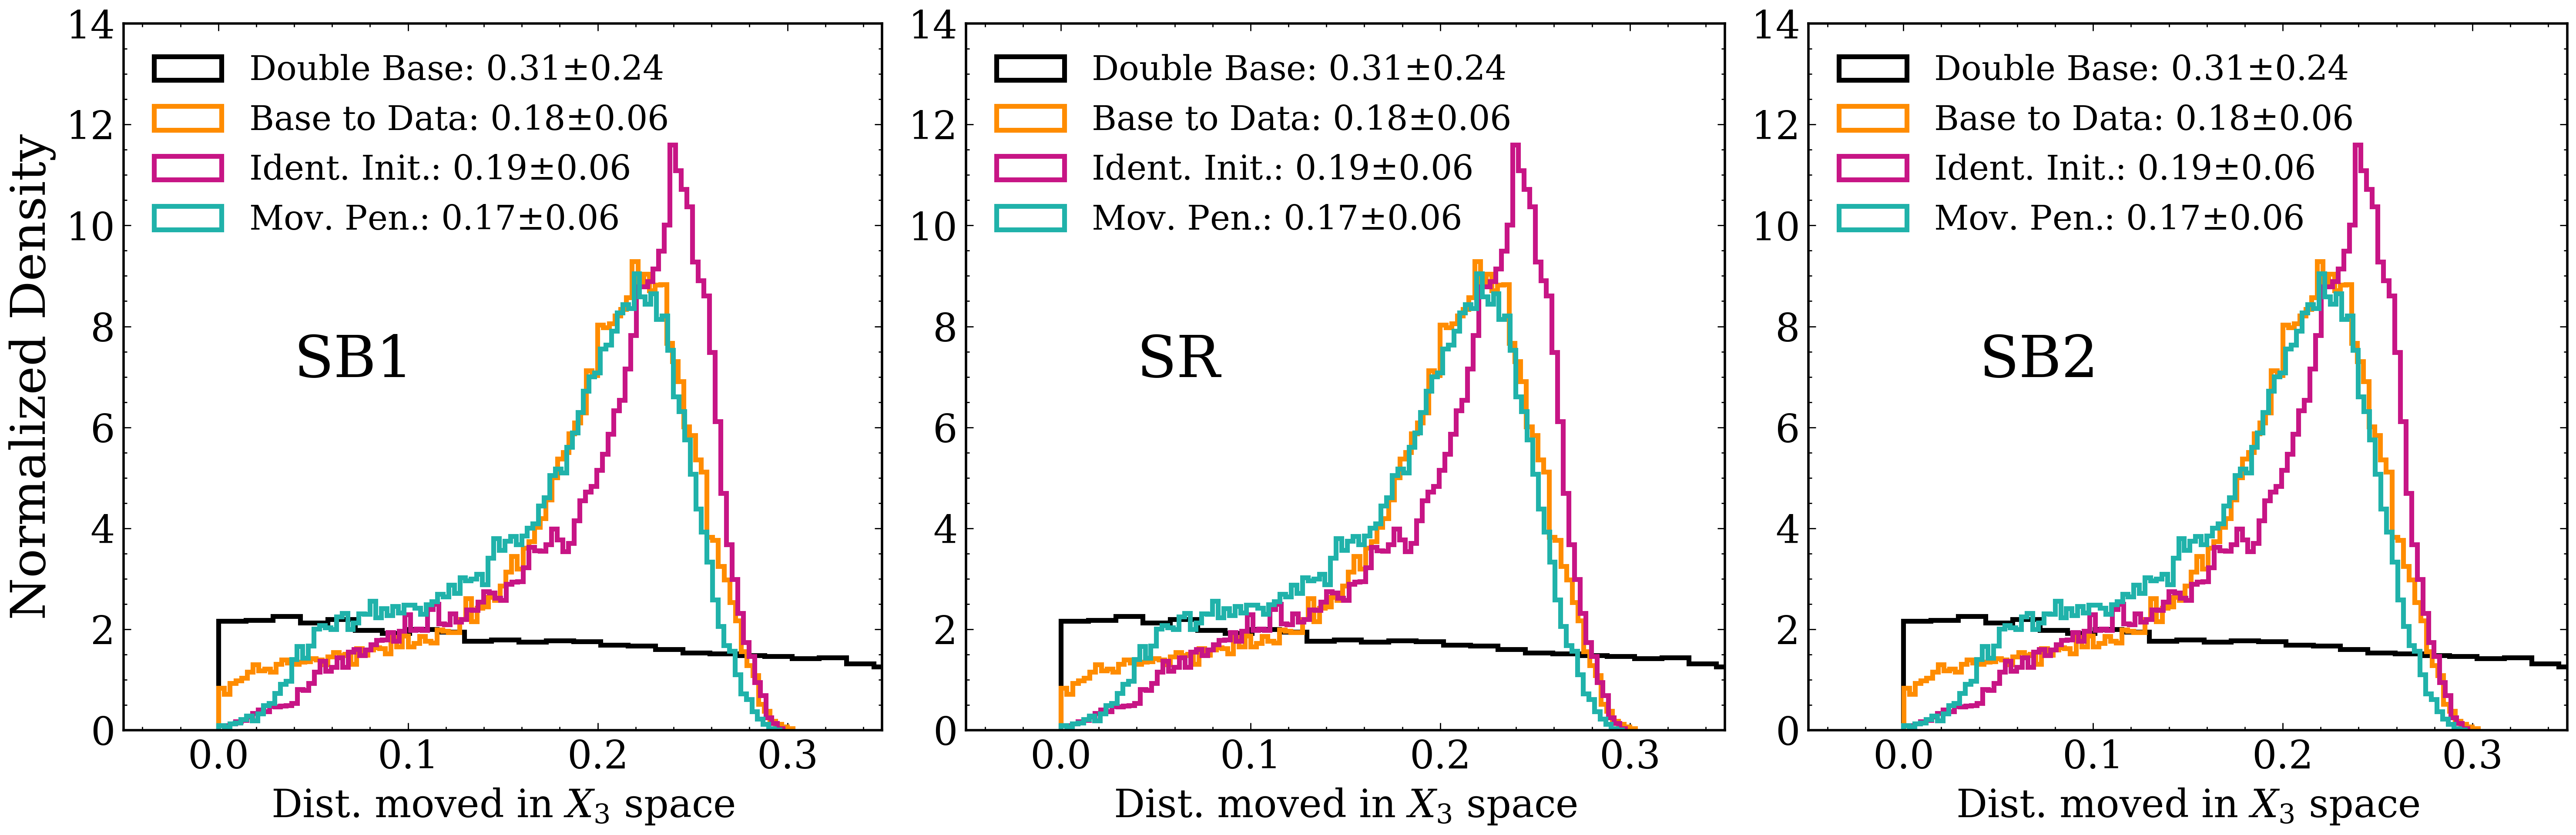

In [145]:
feat_to_plot = 3

fig, ax = plt.subplots(1, 3, figsize = (15, 5))

for k in paths_dict.keys():
    
    for i in range(3):
        
        mean_dist = trunc(np.mean(distances_dicts_single[k][band][feat_to_plot]), 2)
        var_dist = trunc(np.std(distances_dicts_single[k][band][feat_to_plot]), 2)
        
        label_addition = f": {mean_dist}$\pm${var_dist}"
        
        ax[i].hist(distances_dicts_single[k][band][feat_to_plot], bins = 100, density = True, histtype = "step",
                   label = labels_dict[k]+label_addition, color = colors_dict[k], linewidth = w)
        
        
        ax[i].set_ylim(0, 14)
        ax[i].set_xlim(-.05, .35)
        ax[i].set_xlabel(f"Dist. moved in $X_{feat_to_plot}$ space", fontsize = f - 8)
        ax[i].legend(fontsize = f - 10, loc = "upper left")  
        
f = 24

ax[0].text(0.04, 7,"SB1", fontsize = f)
ax[1].text(0.04, 7, "SR", fontsize = f)
ax[2].text(0.04, 7, "SB2", fontsize = f)
    
    
ax[0].set_ylabel("Normalized Density")  


plt.tight_layout()
fig.savefig(f"paper_plots/distances_{feat_to_plot}.pdf", dpi = dpi)


fig.show()
   